# Advanced Machine Learning Concepts

In the previous tutorial we saw the most basic ML algorithms and how they can be used through scikit-learn. However, in order to maximize their potential and achieve better scores we must have a better understanding of a few more advanced concepts.

The main three issues we will tackle are the following:

- Bias-Variance Tradeoff
- Curse of Dimensionality
- Class Imbalance

## Bias-Variance tradeoff

Bias-Variance tradeoff is the problem of simultaneously minimizing the error originating from two sources:

- **Bias** is an error caused from false assumptions held by the predictor. High bias can cause an algorithm to miss the relevant relations between features and target outputs (**underfitting**).
- **Variance** occurs when the model is overly-sensitive to small fluctuations in the training set. This can cause an algorithm to model the random noise in the training data, impacting its ability to generalize on unseen data (**overfitting**).

This is referred to as a tradeoff because reducing one of these two error types might raise the other.

In [2]:
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

We'll try to create a problem where these two errors become apparent.

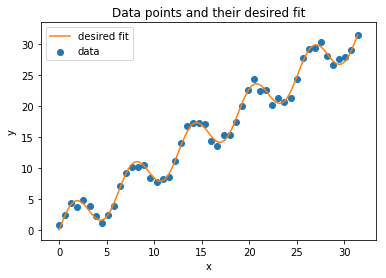

In [2]:
#                                                  CODE:
#                              --------------------------------------------

# Sample points out of a waivy curve and add noise to them 
x = np.linspace(0, 10 * np.pi, 50).reshape(-1,1)
y = x + 3 * np.sin(x)
noise = np.random.random(50).reshape(-1,1)
noise -= noise.mean() # center noise at 0
noisy = y + noise * 2

#                                                PLOTTING:
#                              --------------------------------------------

# Draw the data points along with the line they follow
ax = plt.subplot(111)
ax.plot(np.linspace(0, 10 * np.pi, 100), 
        np.linspace(0, 10 * np.pi, 100) + 3 * np.sin(np.linspace(0, 10 * np.pi, 100)),
        color='#ff7f0e', label='desired fit')
ax.scatter(x, noisy, label='data')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Data points and their desired fit')
plt.legend()

### Bias

To demonstrate the first error category, bias, we'll try to fit a linear regression through this data.

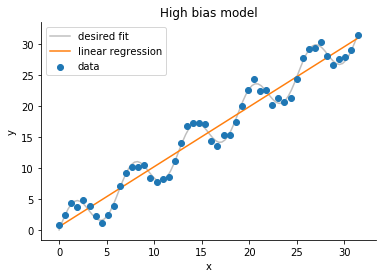

In [3]:
#                                                  CODE:
#                              --------------------------------------------

from sklearn.linear_model import LinearRegression

lin = LinearRegression()
lin.fit(x, noisy)
y_lin = lin.predict(x)

#                                                PLOTTING:
#                              --------------------------------------------

ax = plt.subplot(111)
ax.plot(np.linspace(0, 10 * np.pi, 100), 
        np.linspace(0, 10 * np.pi, 100) + 3 * np.sin(np.linspace(0, 10 * np.pi, 100)),
        color='gray', label='desired fit', zorder=-1, alpha=0.5)
ax.plot(x, y_lin, color='#ff7f0e', label='linear regression', zorder=-1)
ax.scatter(x, noisy, label='data')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('High bias model')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

plt.legend()

This is an illustration of **high bias** in a model. As stated previously the model, in this case, can't *comprehend* some meaningful relations in the data. This causes it to learn an estimation that is not as precise as we would have hoped. In ML terminology this is referred to as **underfitting**.

In this case high bias is attributed to the data violating two of the main assumptions of linear regression (linearity and autocorrelation). This means that the model we selected is **not complex enough** to sufficiently represent the data. The ability of an algorithm to model the complexity of the data is called its **capacity** and, in this case, it is too low.

The two main reasons for high bias are:

- We selected a model with a low capacity.
- We didn't let the model complete its training (we stopped it too soon).

### Variance

In order to demonstrate the effect of high variance we are going to use a Decision Tree. Decision Trees are notorious for overfitting.

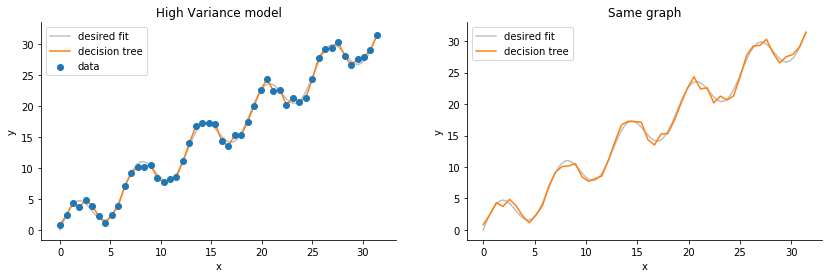

In [4]:
#                                                  CODE:
#                              --------------------------------------------

from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor()
dtr.fit(x, noisy)
y_dtr = dtr.predict(x)

#                                                PLOTTING:
#                              --------------------------------------------

plt.figure(figsize=(14, 4))
ax1 = plt.subplot(121)
ax1.plot(np.linspace(0, 10 * np.pi, 100), 
         np.linspace(0, 10 * np.pi, 100) + 3 * np.sin(np.linspace(0, 10 * np.pi, 100)),
         color='gray', label='desired fit', zorder=-1, alpha=0.5)
ax1.plot(x, y_dtr, color='#ff7f0e', label='decision tree', zorder=-1)
ax1.scatter(x, noisy, label='data')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_title('High Variance model')
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.yaxis.set_ticks_position('left')
ax1.xaxis.set_ticks_position('bottom')
ax1.legend()

ax2 = plt.subplot(122)
ax2.plot(np.linspace(0, 10 * np.pi, 100), 
        np.linspace(0, 10 * np.pi, 100) + 3 * np.sin(np.linspace(0, 10 * np.pi, 100)),
        color='gray', label='desired fit', zorder=-1, alpha=0.5)
ax2.plot(x, y_dtr, color='#ff7f0e', label='decision tree', zorder=-1)
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_title('Same graph')
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.yaxis.set_ticks_position('left')
ax2.xaxis.set_ticks_position('bottom')

ax2.legend()

The model has learned to represent not only the relationships in the data but also its noise. This phenomenon is caused because Decision Trees are highly sensitive to the variance of their input. This effect is more commonly called **overfitting** in ML terminology.

While in this state, the model will produce an error of $0$ on the training set; it will, however, have a high error on data the model hasn't seen before (i.e. the test set). This can complicate things a lot, as it makes an unbiased evaluation of a model's performance much harder; the fact that models overfit is actually the reason we have a test set. The model's ability to predict values that it hasn't seen in the training set is referred to as **generalization**. Overfitting can only be caused if the model has a very high capacity (enough to learn the training data by heart).

### Tradeoff

As mentioned previously, high bias occurs when a model's capacity is to small, while high variance can occur when it's too large. Practically, attempting to reduce one of these errors might result in the increase of the other. This is why we referred to them in the context of a tradeoff.

### In practice...

Despite this, achieving **both** low bias and low variance is possible but difficult to get. 

![](http://www.machinelearningtutorial.net/wp-content/uploads/2017/01/bias-variance-tradeoff.svg)

A practical guide to dealing with this type of issue is:

1. First, try to **reduce the bias**. This is done by selecting a model with a **high enough** capacity of modelling the data. You can ensure this by reducing the error on the training set as much as possible. This will produce a high-variance model, but we don't care about it at this point.
2. Then we should **reduce the variance**. The easiest way to do so is to **regularize** the model. Regularization is a technique that puts a constraint on the model during its training phase, so that is isn't so sensitive to the variance of the data. This **will** hurt the model's training performance, but hopefully will also increase its ability to generalize. 
3. If the model is still overfitting, we can try other techniques such as **bagging**, **early stopping** or even **inducing noise to the input**.

Other resources: *[What should I do when my neural network doesn't generalize well?](https://stats.stackexchange.com/a/365806/119015)*.

### Overfitting on the test set

Consider the following hyper-parameter optimization methodology:

1. Split the data into a training and a test set.
2. Select some values for the hyper-parameters.
3. Train the model on the training set.
4. Evaluate the model on the test set.
5. Change the hyper-parameter values.
6. Repeat steps 2-5 for, let's say, 100 times.
7. Finally, we select the hyper-parameters that achieved the best scores on the test set and train the model on them, one last time.

Is there any flaw in the logic? The evaluation was carried out on a separate test set, so there can't be any form of overfitting, right?

**Wrong**. The way the experiment was carried out, the hyper-parameters were optimized to achieve the best performance on the test set. However, if we had a secondary test set, this previous selection of hyper-parameters probably wouldn't be optimal for this secondary set and the model's performance might have been worse than expected.

The reason is that during training, we indirectly gave our model information about the test set, **through the hyper-parameter selection process**.

### Holdout strategy

The easiest way to fix this is to add a third set called a **validation set**, whose goal is to help with the hyperparameter selection. A better strategy would be the following:

1. Shuffle and split the original dataset into three separate sets: a training, a validation and a test set.
2. Select initial hyperparameter values.
3. Train the model on the training set.
4. Evaluate the model on the **validation set**.
5. Change the hyperparameter values.
6. Repeat steps 2-5 until we are satisfied with the performance.
7. Train the model with the best hyperparameters on the training and validation sets and evaluate the model, one last time, on the **test set**.   
Note that this is the first time during the whole training procedure that this set is witnessed.
8. If performance is satisfactory, train the model on the original dataset and we can now use the model as we see fit. If not, we must **scrap** the whole process and restart from step 1!

The test set performance is the closest we'll get to an **unbiased estimate** of how our model is performing.

![](http://www.cs.nthu.edu.tw/~shwu/courses/ml/labs/08_CV_Ensembling/fig-holdout.png)

What have we gained from partitioning the original data into three sets?

This way we have a test set that has not been seen through the whole training process. If we witness an unnatural dropoff from the validation set's performance to the test set's, then we know we have actually overfit on the validation data and we must scrap everything and start over. If not, we are good to go.

In [4]:
#                                                  CODE:
#                              --------------------------------------------

from sklearn.model_selection import train_test_split

x = np.random.random(size=(1000, 10))
y = np.random.random(size=(1000, 1))

x_tmp, x_test, y_tmp, y_test = train_test_split(x, y, test_size=0.25)
x_train, x_val, y_train, y_val = train_test_split(x_tmp, y_tmp, test_size=0.33)

print('total number of samples: ', len(x))
print('train set size:          ', len(x_train))
print('validation set size:     ', len(x_val))
print('test set size:           ', len(x_test))

total number of samples:  1000
train set size:           502
validation set size:      248
test set size:            250


### Cross-validation

Instead of using a holdout validation set, we can use a technique called **cross-validation** for hyper-parameter optimization. This technique causes the models to be less sensitive to the initial random train-test split and produces a more unbiased estimate of the algorithm's performance. Also it makes the validation scores more insensitive to hyper-parameter shifts, which reduces overfitting on the validation set.

So, how does it work?  
First, we need to select a **number of folds** (let's say $5$). This technique will split the original data into $5$ parts and train the model $5$ times, each using a different part as the test set and the remaining $4$ as the training set. When completing the training of all $5$ classifiers, it will average the $5$ scores produced on the $5$ different test sets.

![](https://i.stack.imgur.com/1fXzJ.png)

### Cross-validation or validation/test set?

As stated previously, complex models will tend to memorize the training set. This is why we need another set (with different examples than the ones the model was trained on) to evaluate the model. A typical ML workflow includes training a model multiple times, evaluating the model on unseen data and choosing the hyperparameters according to the results of this evaluation.
However, this might cause the model to **overfit on the test set**! The choices of hyperparameters we made, are a direct result of the examples contained in the test set.

To deal with this we need to either have 3 sets:

- A **training set** to train the model on.
- A **validation set** to evaluate our model and help us with the hyperparameter tuning.
- A **test set** to use for the final evaluation of the model.

If we want to use cross-validation we **don't** need the validation set. But it is still **strongly advised** to have a test set for the reasons stated above. In this case we should:

1. **Split** the data into a train-test set.
2. Train and evaluate our models on the training set using **cross-validation**.
3. Perform our final assessment of the model's performance on the **test set**.

### Pros and cons of cross-validation

Assume $k$-fold cross-validation.

**Pros:**

- Almost impervious to overfitting. Because for each hyper-parameter the model is trained $k$ times and each is evaluated on a completely different validation set, it is much harder to overfit on the accumulative validation set.

- Results are more reliable because they are averaged from $k$ separate validation sets. This provides a more accurate estimate of the model's performance.

**Cons:**

- It takes longer to train. For each hyper-parameter we want to check, the model is trained and evaluated $k$ times.


## Curse of Dimensionality

With the word dimensions of a dataset, we refer to the number of features in it. More dimensions mean more features, which is a good thing, right? **Not always**! There are various problems arising as the dimensionality of our data increases. The most common problem is associated with the **sparsity** of data in high-dimensional spaces. As the number of dimensions grows, the amount of data we need to generalize accurately grows exponentially. This is illustrated in the figure below:

![curse of dimensionality](https://i.imgur.com/tXjjCsm.png)

Imagine a problem where we have thousands of dimensions. The value added by increasing the dimensions even more would be smaller than the overhead induced in most ML algorithms.

Let's try to illustrate a few of the problems that arise as problems become more and more high-dimensional.

**Warning**: The cell below takes a few minutes to run. If you find it taking too long you can either reduce the value of `n_samples` or reduce the value of `max_dimensions`.

In [5]:
#                                                  CODE:
#                              --------------------------------------------

from scipy.spatial.distance import pdist  # we'll use this for calculating the euclidean distance between all points
from tqdm import tqdm
import time

n_samples = 1000      # number of samples
max_dimensions = 500  # largest number of dimensions
regions_per_dim = 10  # how many regions to split each dimension into

def outlier_prob(points):
    """
    Function that calculates the probability of a point having an outlier in any dimension.
    An outlier is defined as being in the smaller that 0.01 or larger than 0.99 (less than 2% combined chance).
    """
    return np.mean([any([(d < .01 or d > .99) for d in p]) for p in points])

times = []          # will store the time needed to compute the euclidean distance
avg_dists = []      # will store the average distance between all data points
densities = []      # will store the density (defined as n_samples / total_number_of_regions)
outlier_probs = []  # will store the probability that a data point has an outlier in any dimension

# Run estimations, might take a minute.
for d in tqdm(range(1, max_dimensions + 1)):
    points = np.random.uniform(size=n_samples * d).reshape(n_samples, d)  # samples drawn from a uniform distribution
    start_time = time.time()
    dist = pdist(points).mean()                            # average distance between all data points
    times.append(time.time() - start_time)                 # time needed to compute the previous distances
    avg_dists.append(dist)
    densities.append(len(points) / (regions_per_dim * d))  # density
    outlier_probs.append(outlier_prob(points))             # outlier probability

100%|████████████████████████████████████████████████████████████████████████████████| 500/500 [03:33<00:00,  1.14it/s]


Notice the status bar on the bottom? It went really fast at first but **slowed down** as it progressed. This is an indication that one drawback of working with higher dimensions is **higher computation times**. 

Let's see if the time we tracked confirms this observation.

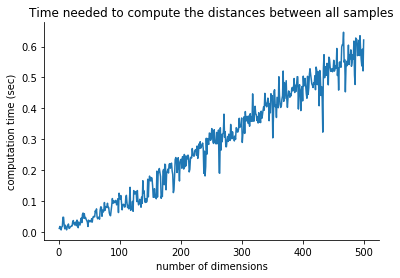

In [6]:
#                                                PLOTTING:
#                              --------------------------------------------

ax = plt.subplot(111)
ax.plot(range(1, max_dimensions + 1), times)
ax.set_xlabel('number of dimensions')
ax.set_ylabel('computation time (sec)')
ax.set_title('Time needed to compute the distances between all samples')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

The computation time needed for calculating the euclidean distance between all samples appers to **increase linearly** as the number of dimensions grows. 

This is evident from the distance's equation:

$$
dist(a, b) = \sqrt{ \sum_{i=1}^M{ \left( a_i - b_i \right) ^2 }}
$$

where $M$ is the number of dimensions. As $M$ increases, more terms need to be calculated and summed, which increases the computation time.

Furthermore, as the dimensions of the data increase, so does their **sparsity**. The next few points aim at confirming this claim. 

First, let's examine the **average distance** of the data points. 

Suppose two points have a distance of $1$ in each dimension.
- If they were $1$-dimensional their distance would be $1$.
- If they were $2$-dimensional their distance would be $\sqrt{1 + 1} = \sqrt{2}$.
- If they were $3$-dimensional their distance would be $\sqrt{1 + 1 + 1} = \sqrt{3}$.
- If they were $M$-dimensional their distance would be $\sqrt{M}$.

Intuitively, we'd expect the points to drift further apart as the number of dimensions increases. Let's see if we can confirm this experimentally.

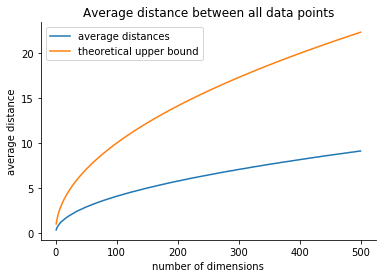

In [7]:
#                                                PLOTTING:
#                              --------------------------------------------

ax = plt.subplot(111)
ax.plot(range(1, max_dimensions + 1), avg_dists, label='average distances')
ax.plot(range(1, max_dimensions + 1), [np.sqrt(i) for i in range(1, max_dimensions +1)], label='theoretical upper bound')
ax.set_xlabel('number of dimensions')
ax.set_ylabel('average distance')
ax.set_title('Average distance between all data points')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.legend()

The results seem to be inline with what we expected. Because the points are sampled from a uniform distribution in $[0, 1]$, their actual distance is less than $1$ in each dimension. This allows us to put an **upper bound** to the maximum distance between two points, which is $\sqrt M$, where $M$ is the number of dimensions.

The next step is to measure the **density** of the data. We'll define density as the number of samples over the total number or regions in the data. This is **not** an official measure:

$$
density = \frac{N}{regions} = \frac{N}{M \cdot regions\_per\_dim}
$$

where $M$ is the number of dimensions and $N$ is the number of samples.

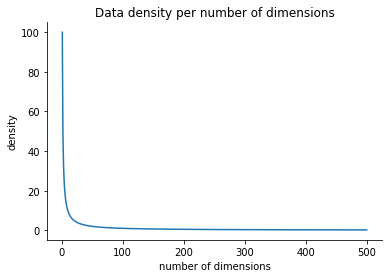

In [8]:
#                                                PLOTTING:
#                              --------------------------------------------

ax = plt.subplot(111)
ax.plot(range(1, max_dimensions + 1), densities)
ax.set_xlabel('number of dimensions')
ax.set_ylabel('density')
ax.set_title('Data density per number of dimensions')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

The *density* of the data decreases **exponentially** as the number of dimensions increase. This is equivalent to our original claim, that we need an exponentially-large number of samples to sufficiently represent a high-dimensional space.

Finally, we'll examine the probability of a sample having an **outlier** in any dimension. As an outlier we'll consider any value below $0.01$ or over $0.99$ (i.e. the bottom and top $1\%$).

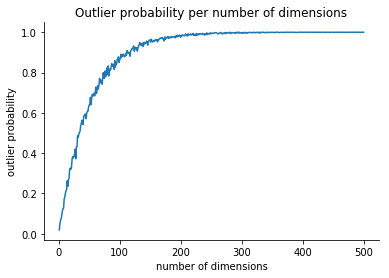

In [9]:
#                                                PLOTTING:
#                              --------------------------------------------

ax = plt.subplot(111)
ax.plot(range(1, max_dimensions + 1), outlier_probs)
ax.set_xlabel('number of dimensions')
ax.set_ylabel('outlier probability')
ax.set_title('Outlier probability per number of dimensions')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

The chance of having an outlier increases exponentially, until after some point, it is almost guaranteed for a sample to have an outlier.

If we feel that the number of dimensions is hurting our model's performance, we could try performing **dimensionality reduction**, i.e. a series of techniques aiming at reducing the number of dimensions while preserving as much information as possible.

In practice the problems arising from dimensionality come into play in very high-dimensional spaces. The sparsity, of the data in such spaces can be useful as the classes usually **become more separable**, helping ML algorithms. In low-dimensional problems, more dimensions are good (as long as they provide meaningful information).

## Class Imbalance

Imagine the following example.  
We want to predict if a patient has a disease ($y = 1$) or not ($y = 0$), based on the values of four features (i.e. $f_1, \; f_2, \; f_3, \; f_4$). Now suppose this disease appears in 1% of the general population. Consequently the data, which is sampled from a real population, has many more negative outcomes than positive.

In [10]:
#                                                  CODE:
#                              --------------------------------------------

imbalance_ratio = 0.01  # ratio of positive to negative samples 
num_samples = 1000      # total number of samples

# Random seed for reproducibility
seed = 13
np.random.seed(seed)

# Create a dataset with easily seperable classes
x = np.array([[np.random.random() * 0.3,
               np.random.random() * 1.5,
               np.random.random() * 0.2,
               np.random.random() * 2.1] for _ in range(int(num_samples * (1 - imbalance_ratio)))] + 
             [[np.random.random() * 1.3, 
               np.random.random() * 0.5,
               np.random.random() * 1.2,
               np.random.random() * 0.7] for _ in range(int(num_samples * (imbalance_ratio)))])

y = np.array([0] * int(num_samples * (1 - imbalance_ratio)) + [1] * int(num_samples * (imbalance_ratio)))

print('Samples per class:', np.unique(y, return_counts=True)[1])

Samples per class: [990  10]


The data depict what we previously said. Only 1% of the total samples are positive examples. Let's try to train a classifier to see how well it performs. 

In [11]:
#                                                  CODE:
#                              --------------------------------------------

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=seed)

lr = LogisticRegression()
lr.fit(x_train, y_train)
print('test set accuracy: {}%'.format(accuracy_score(y_test, lr.predict(x_test)) * 100))

c:\users\thano\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


test set accuracy: 98.8%


The accuracy on the test set is almost 99%. Normally, this result would be adequate.

Let's generate a few more samples to see how well it actually performs.

In [12]:
#                                                  CODE:
#                              --------------------------------------------

np.random.seed(12)

# Generate a few more negative samples
x_negative = np.array([[np.random.random() * 0.3,
                        np.random.random() * 1.5,
                        np.random.random() * 0.2,
                        np.random.random() * 2.1] for _ in range(10)])

# Generate a few more positive samples
x_positive = np.array([[np.random.random() * 1.3, 
                        np.random.random() * 0.5,
                        np.random.random() * 1.2,
                        np.random.random() * 0.7] for _ in range(10)])
    

print('negative example predictions:', lr.predict(x_negative))
print('positive example predictions:', lr.predict(x_positive))

negative example predictions: [0 0 0 0 0 0 0 0 0 0]
positive example predictions: [0 0 0 0 0 0 0 0 0 0]


Now we get a sense of the problem. The model is predicting only $0$'s.

**Why is this happening?**  
Because of the high imbalance in the training set, the model has developed a high bias towards the *negative* class. More specifically, during training, due to the majority of *negative* samples in the training set, the model was actually **rewarded** for predicting $0$, when it was *relatively unsure* for the result.

**What are the consequences?**  
Our model is pretty much **useless**! Why would anyone want a model that only predicts a single class? 

**Why did we get a high accuracy on the test set?**  
The test set has many more $0$'s than $1$'s, so by predicting only $0$ the model made a lot more *hits* than *misses*. In this case, the accuracy isn't very **representative** of the model's performance.

**Should we split the data differently so that we have more *positive* samples in the test set?**  
**No!** For two reasons:
1. This would reduce the number of *positive* samples in the training set, further **impairing** the model's ability to learn.
2. We want the test set to **follow the same distribution** as the training set.

**So, what should we do?**  
The problem can be decomposed into two main issues: **Evaluation** and **Training**:
- The first issue we encountered is that we have no way of properly **evaluating the model's performance**.
- The second issue is that the model has a **high-bias towards one of the classes**.

Let's just focus on one at the time and deal with the first.

### Confusion matrix metrics 

In order to measure the performance of classifiers, in imbalanced problems we need to look at each class separately. We are going to define four metrics for each class. For any given class $c$:

- **True Positive** (TP): is an example that the classifier **correctly** predicted belongs to class $c$.
- **False Positive** (FP): is an example that the classifier **wrongly** predicted belongs to class $c$. Also referred to as type I error.
- **True Negative** (TN): is an example that the classifier **correctly** predicted does **not** belong to class $c$.
- **False Negative** (FN): is an example that the classifier **wrongly** predicted does **not** to class $c$. Also referred to as type II error.

These can be summed up into a so-called **confusion matrix**:

$$
\begin{array}{c|c|c}
 &Actual \; positive & Actual \; negative \\ \hline
Predicted \; positive & TP & FP \\
Predicted \; negative & FN & TN \\
\end{array}
$$

Depending on which combination of the above we wish to minimize there are several metrics that aggregate them ([sensitivity and specificity](https://en.wikipedia.org/wiki/Sensitivity_and_specificity), [positive and negative predicted values](https://en.wikipedia.org/wiki/Positive_and_negative_predictive_values), [false discovery rate](https://en.wikipedia.org/wiki/False_discovery_rate), etc.). We will examine the two most common used in information theory:

- **Precision**: The amount of examples of class $c$ **we got right** over the total number of examples **we predicted** were of class $c$. Precision, as its name suggests, tells us how *precise* our model is. A high precision score for class $c$ can be achieved if a model predicts this class **only when it is sure**.

$$ \frac{TP}{TP+FP} $$

- **Recall**: The amount of examples of class $c$ **we got right** over the **total number of class $\mathbf c$ instances** there were. Recall provides information on how many samples of a class the model didn't predict. Recall for class $c$ can be increased if the model *guesses* a lot of $c$'s when it's not sure.

$$ \frac{TP}{TP+FN} $$

In order to obtain a single value indicating the performance of the classifier on class $c$, we usually take the harmonic mean of the above two, or the [f1-score](https://en.wikipedia.org/wiki/F1_score) as its called.

$$ F_1 = 2 \cdot \frac{precision \cdot recall}{precision + recall} $$

Just keep in mind that up to this points all metrics are computed **per class** (i.e. each class has its own precision, recall $F_1$, etc.)

In [13]:
#                                                  CODE:
#                              --------------------------------------------

preds = lr.predict(x_test)

# Positive class:
TP_1 = np.sum(y_test * preds)              # because the two arrays have only values in {0, 1}, their
                                           # union can be simply calculated as their elementwise product 
FP_1 = preds.sum() - TP_1                  # by subtracting the predictions we got correct from the 
                                           # total number of predictions, we get the predictions we missed
FN_1 = y_test.sum() - TP_1                 # by subtracting the predictions we got correct from the 
                                           # total number of samples, we get the samples we missed
TN_1 = len(y_test) - TP_1 - FP_1 - FN_1    # from the total number of samples remove the ones we correctly
                                           # predicted to be true, along with samples we missed either way

# Negative class:
TP_0 = np.sum((1 - y_test) * (1 - preds))  # reverse the arrays to get the metrics for the negative class
FP_0 = (1 - preds).sum() - TP_0
FN_0 = (1 - y_test).sum() - TP_0
TN_0 = len(1 - y_test) - TP_0 - FP_0 - FN_0

# Because we're interested more in the positive class we'll just plot its confusion matrix
print('         |    True   |')
print('         |  1  |  0  |')
print('         -------------')
print('Pred | 1 | {:^3} | {:^3} |'.format(TP_1, FP_1))
print('     | 0 | {:^3} | {:^3} |'.format(FN_1, TN_1))

         |    True   |
         |  1  |  0  |
         -------------
Pred | 1 |  0  |  0  |
     | 0 |  3  | 247 |


By counting each of the four possible outcomes for a single class, we can easily see where our model went wrong. In the present case, it didn't make a single positive prediction, evident by the first row of the confusion matrix (i.e. $TP = FP = 0$).

Like we said previously, the confusion matrix values can be summed up into several metrics: 

In [14]:
#                                                  CODE:
#                              --------------------------------------------

smooth = np.finfo(float).eps  # smallest possible float

precision = TP_1 / (TP_1 + FP_1 + smooth)  # add smooth in case of zero divisions 
recall = TP_1 / (TP_1 + FN_1 + smooth)
f1 = 2 * precision * recall / (precision + recall + smooth)

print('Precision:', precision)
print('Recall:   ', recall)
print('F1:       ', f1)

Precision: 0.0
Recall:    0.0
F1:        0.0


These metrics are all zero, because the number of correct predictions for the *positive* class ($TP_1$) was zero.

### Multi-class

The confusion matrix can be drawn when we have more than one classes. Imagine the following example:

We've trained a model to predict if a fruit is a *banana* (*B*), an *orange* (*O*) or an *apple* (*A*). The test set labels and predictions are presented below.

$$
\begin{array}{c c c | c c c | c c c}
   & y & \hat y &    &  y  & \hat y &  & y & \hat y \\ \hline
1  & B &   B    & 11 &  O  &   B    & 21 & B & B \\
2  & B &   B    & 12 &  A  &   B    & 22 & B & B \\
3  & A &   B    & 13 &  B  &   B    & 23 & B & A \\
4  & B &   B    & 14 &  A  &   A    & 24 & A & A \\
5  & B &   B    & 15 &  B  &   B    & 25 & B & B \\
6  & B &   B    & 16 &  A  &   B    & 26 & A & B \\
7  & A &   A    & 17 &  B  &   B    & 27 & B & B \\
8  & B &   B    & 18 &  O  &   B    & 28 & O & B \\
9  & O &   O    & 19 &  B  &   B    & 29 & B & A \\
10 & B &   B    & 20 &  O  &   A    & 30 & B & B \\
\end{array}
$$

This is a problem with 3 classes. There are 3 unique values that each prediction hand each label can take (i.e. *B*, *A*, *O*). Subsequently, the confusion matrix will need to have 3 rows and 3 columns to capture all possible outcomes.

$$
\begin{array}{ c | c c c}
 & Banana & Apple & Orange \\ \hline
Banana    & 16 & 4 & 3 \\
Apple     & 2  & 3 & 1 \\
Orange    & 0  & 0 & 1 \\
\end{array}
$$

Like before, the rows represent the predictions and the columns represent the labels. The second element of the first row (i.e. $1$) shows the number of samples that were predicted as *Bananas*, but actually were *Apples*. 

While this matrix shows all possible outcomes in much detail, it isn't very practical in situations where we have a **large number of classes**. Furthermore, not all information is necessarily relevant. When looking at why our model isn't predicting *Oranges* very well, we usually just want to see that class' TP, FP, FN, and TN. 

Subsequently this matrix can be **decomposed** into $M$ confusion matrices, one for each class:

- For *Bananas*:
$$
\begin{array}{c|c|c}
 & Banana & Not \; Banana \\ \hline
Predicted \; Banana        & 16 & 7 \\
Predicted \; not \; Banana & 2  & 5 \\
\end{array}
$$

- For *Apples*:
$$
\begin{array}{c|c|c}
 & Apple & Not \; Apple \\ \hline
Predicted \; Apple        & 3 & 3  \\
Predicted \; not \; Apple & 4 & 20 \\
\end{array}
$$

- For *Oranges*: 
$$
\begin{array}{c|c|c}
 & Orange & Not \; Orange \\ \hline
Predicted \; Orange        & 1 & 0 \\
Predicted \; not \; Orange & 4 & 25 \\
\end{array}
$$

Since we have 3 confusion matrices, one for each class, we can calculate 3 precisions, recalls and $F_1$ scores.

In [15]:
#                                                  CODE:
#                              --------------------------------------------

# Compute precision, recall, F1 from confusion matrix metrics
def conf_matrix_metrics(TP, FP, FN):
    precision = TP / (TP + FP + smooth) 
    recall = TP / (TP + FN + smooth)
    f1 = 2 * precision * recall / (precision + recall + smooth)
    return precision, recall, f1

# Manually add confusion matrix metrics for the example above
TP_b, FP_b, FN_b, TN_b = 16, 7, 2, 5
TP_a, FP_a, FN_a, TN_a = 3, 3, 4, 20
TP_o, FP_o, FN_o, TN_o = 1, 0, 4, 25

prec_b, rec_b, f1_b = conf_matrix_metrics(TP_b, FP_b, FN_b)
prec_a, rec_a, f1_a = conf_matrix_metrics(TP_a, FP_a, FN_a)
prec_o, rec_o, f1_o = conf_matrix_metrics(TP_o, FP_o, FN_o)

print('Bananas:')
print('Precision =', prec_b)
print('Recall =', rec_b)
print('F1 =', f1_b)

print('\nApples:')
print('Precision =', prec_a)
print('Recall =', rec_a)
print('F1 =', f1_a)

print('\nOranges:')
print('Precision =', prec_o)
print('Recall =', rec_o)
print('F1 =', f1_o)

Bananas:
Precision = 0.6956521739130435
Recall = 0.8888888888888888
F1 = 0.7804878048780487

Apples:
Precision = 0.5
Recall = 0.42857142857142855
F1 = 0.4615384615384614

Oranges:
Precision = 0.9999999999999998
Recall = 0.2
F1 = 0.33333333333333326


Given the confusion matrices and the other three metrics, how can we interpret the results?

- *Bananas* are achieving a **high recall** compared to the other classes. The reason is that the classifier is predicting bananas at a very high frequency (i.e. $23/30$ predictions are *Bananas*); we could say that our model is biased towards *Bananas*. This causes the model to predict almost all *Banana* samples in the test set. However, this also means that *Bananas* have a **low precision** as many of these predictions are wrong. 

- *Apples* have pretty average scores all around.

- *Oranges* are the class with the least samples. This has caused our model to rarely predict *Oranges*. In turn this causes **recall to drop**, as the model is missing a lot of *Oranges*, and its **precision to raise**, as it predicts *Oranges* only when it's sure.

Finally, in many cases we might want to combine the class metrics into a single one, that shows us how well we're doing. The most common ways of averaging the metrics for each class into a single number are:

- **micro-averaging**: We first sum up the TP, FP, FN and TN for each class and compute the metrics.

- **macro-averaging**: We compute the metrics for each class and then average them.

Micro-averaging is usually the **default** way of computing metrics in a multi-class problem. It treats **all samples equally**, when computing, which **favors the over-represented classes** in imbalanced problems. 

Macro-averaging on the other hand treats **all classes equally**, which means that the **each sample** of the **under-represented class** counts more than one from an over-represented class.

In [16]:
#                                                  CODE:
#                              --------------------------------------------

TP_total = TP_b + TP_a + TP_o
FP_total = FP_b + FP_a + FP_o
FN_total = FN_b + FN_a + FN_o
TN_total = TN_b + TN_a + TN_o

prec_total, rec_total, f1_total = conf_matrix_metrics(TP_total, FP_total, FN_total)

print('Micro-precision =', prec_total)
print('Micro-recall =', rec_total)
print('Micro-F1 =', f1_total)

print('\nMacro-precision =', (prec_b + prec_a + prec_o) / 3)
print('Macro-recall =', (rec_b + rec_a + rec_o) / 3)
print('Macro-F1 =', (f1_b + f1_a + f1_o) / 3)

Micro-precision = 0.6666666666666666
Micro-recall = 0.6666666666666666
Micro-F1 = 0.6666666666666665

Macro-precision = 0.7318840579710143
Macro-recall = 0.5058201058201058
Macro-F1 = 0.5251198665832811


Like we said, micro-averaged metrics tend to be more influenced by the majority class, while macro-averaged ones treat each class the same. When considering which one to choose, both have their advantages and disadvantages. My recommendation would be if you want the metrics to depict the **actual performance** of the model, select **micro-averaged** metrics. On the other hand, if you care **equally for all classes** regardless of the number of samples in each, choose a **macro-averaged** metric.

### Dealing with imbalanced data

Now that we've figured out a way of properly evaluating a model on highly-imbalanced data, we need to address the impact it has on the model's performance. As stated previously, models trained on imbalanced data tend to develop a **high-bias towards the over-represented classes**. This can deteriorate the model's performance and in extreme cases even cause the model to collapse (i.e. predict just one class).

The reason this is happening has a lot to do with how the model learns. During training, when the model isn't sure about a prediction, it is much more likely to be from an over-represented class, than from an under-represented one. In the long term, this mechanism **rewards** the model for *guessing* the over-represented class in such situations.

There are two directions from which we can approach this issue: From a **data** point of view and from a **model** point of view. 

- The first addresses the problem from its root, i.e. the **data**. These methods try to **resample** the input data, so that they aren't as imbalanced. Again there are two separate categories here:

    - **Over-sampling** the under-represented classes. This involves generating **artificial samples** for the classes with the fewest number of samples, with the goal of increasing their size.
    
    - **Under-sampling** the over-represented ones. This involves **disregarding** some samples from the classes with the most samples to reduce their size.
    
- The second direction is to **modify the loss function** of our model to pay more attention to each sample from the under-represented classes. This is done by adding a **weight** to each sample according to its class; samples with large weights will influence the loss more than samples with small ones.

We'll see both of these methods in action in a later tutorial.